In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,VotingClassifier,StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler



## **Data Collection** 

In [3]:
df = pd.read_csv('Employee_HR.csv')

## **Data Representation**

In [23]:
df.head()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,780152,3.8,5.3,2,157,3,0,0,sales,11053,1
1,780153,8.0,8.6,5,262,6,0,0,sales,54063,1
2,780154,1.1,8.8,7,272,4,0,0,sales,61300,1
3,780155,7.2,8.7,5,223,5,0,0,sales,20647,1
4,780156,3.7,5.2,2,159,3,0,0,sales,17808,1


## **Data Wrangling**

### **Hanlde Missing Values**

In [24]:
df.isna().sum()

EmpId                   0
Satisfaction            0
Evaluation              0
number_of_projects      0
average_montly_hours    0
time_spent_company      0
work_accident           0
Promotion               0
Department              0
Salary_INR              0
Churn                   0
dtype: int64

### **Drop Duplicated Values**

In [25]:
df.duplicated().sum()

np.int64(0)

### **Data Analysis**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmpId                 14999 non-null  int64  
 1   Satisfaction          14999 non-null  float64
 2   Evaluation            14999 non-null  float64
 3   number_of_projects    14999 non-null  int64  
 4   average_montly_hours  14999 non-null  int64  
 5   time_spent_company    14999 non-null  int64  
 6   work_accident         14999 non-null  int64  
 7   Promotion             14999 non-null  int64  
 8   Department            14999 non-null  object 
 9   Salary_INR            14999 non-null  int64  
 10  Churn                 14999 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 1.3+ MB


#### **Satisfaction**

In [27]:
df['Satisfaction'].describe()

count    14999.000000
mean         6.128335
std          2.486307
min          0.900000
25%          4.400000
50%          6.400000
75%          8.200000
max         10.000000
Name: Satisfaction, dtype: float64

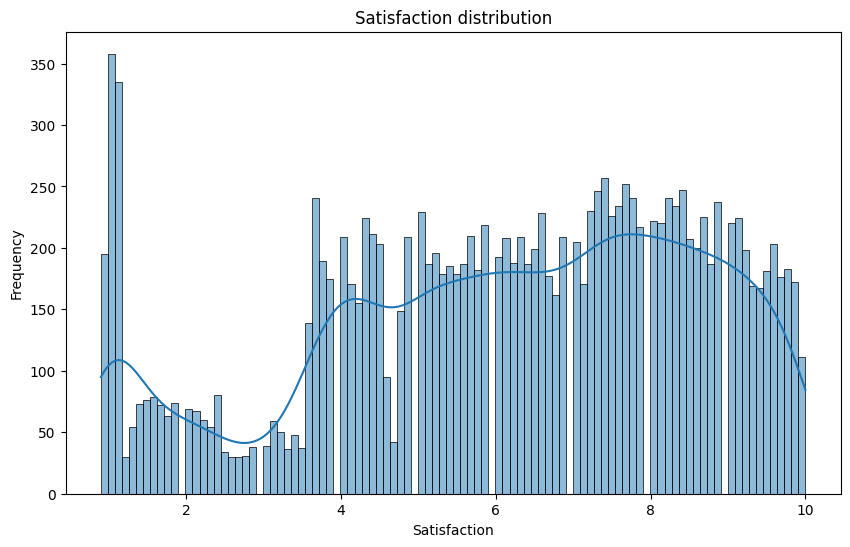

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(df['Satisfaction'],bins=100, kde=True)  
plt.title("Satisfaction distribution")
plt.xlabel("Satisfaction")
plt.ylabel("Frequency")
plt.show()

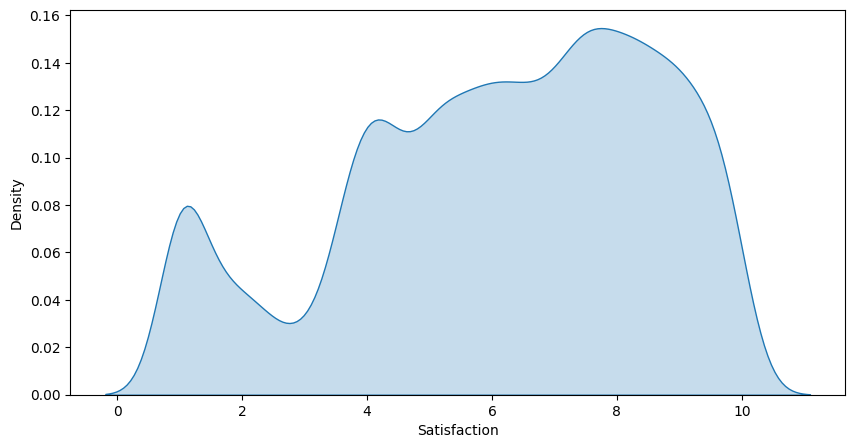

In [29]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Satisfaction'],fill=True)
plt.show()

#### **Evaluation**

In [30]:
df['Evaluation'].describe()

count    14999.000000
mean         7.161017
std          1.711691
min          3.600000
25%          5.600000
50%          7.200000
75%          8.700000
max         10.000000
Name: Evaluation, dtype: float64

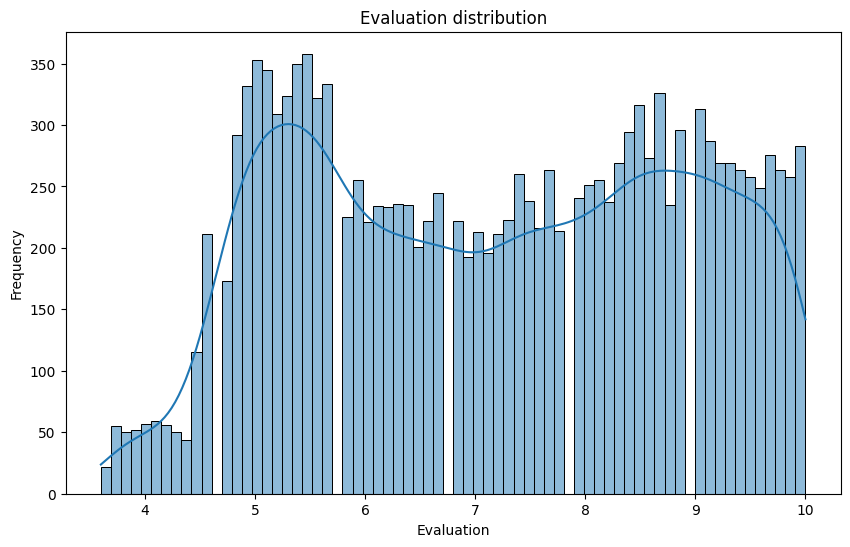

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df['Evaluation'],bins=70, kde=True)  
plt.title("Evaluation distribution")
plt.xlabel("Evaluation")
plt.ylabel("Frequency")
plt.show()

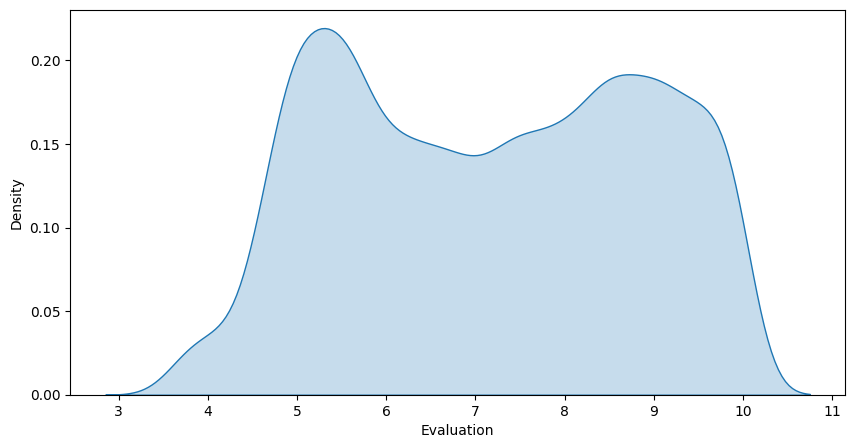

In [32]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Evaluation'],fill=True)
plt.show()

#### **number_of_projects**

In [33]:
df['number_of_projects'].value_counts()

number_of_projects
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2770363711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['number_of_projects'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2770363711.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot( x=df['number_of_projects'].value_counts().index,


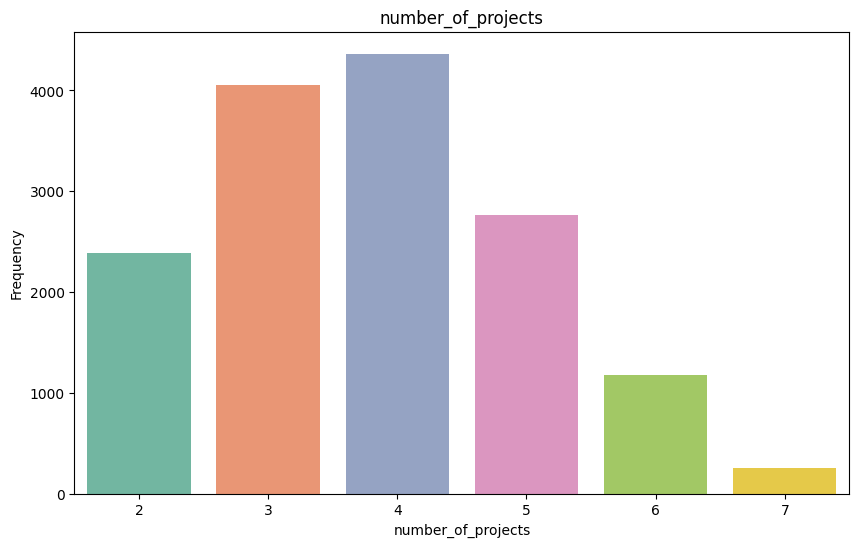

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['number_of_projects'].value_counts().index,
            y=df['number_of_projects'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('number_of_projects')
plt.xlabel('number_of_projects')
plt.ylabel('Frequency')
plt.show()

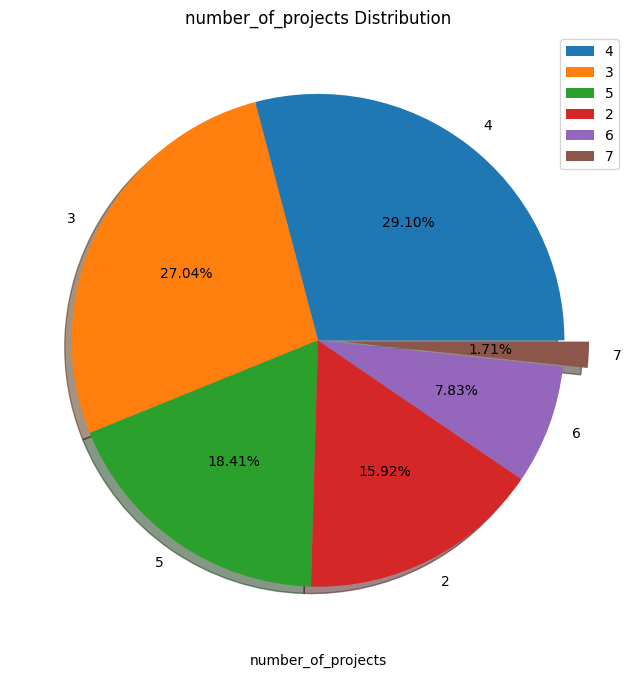

In [35]:
plt.figure(figsize=(10, 8))
plt.pie(df['number_of_projects'].value_counts(),
        explode=[0,0,0,0,0,0.1],
        labels=df['number_of_projects'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('number_of_projects Distribution')
plt.xlabel('number_of_projects')
plt.legend()
plt.show()

#### **average_montly_hours**

In [36]:
df['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

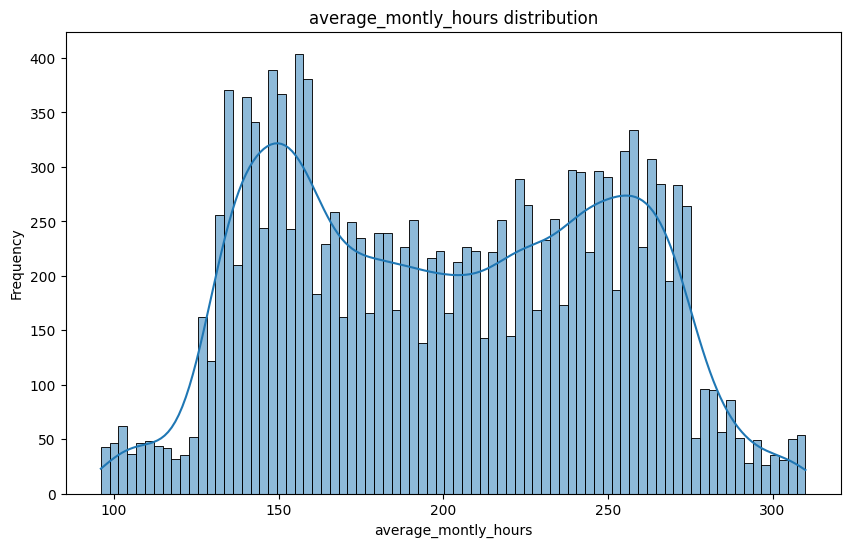

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df['average_montly_hours'],bins=80, kde=True)  
plt.title("average_montly_hours distribution")
plt.xlabel("average_montly_hours")
plt.ylabel("Frequency")
plt.show()

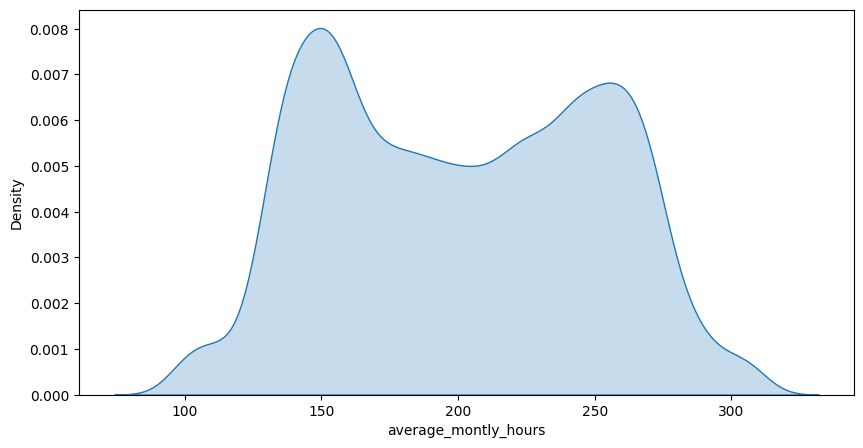

In [38]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['average_montly_hours'],fill=True)
plt.show()

#### **time_spent_company**

In [39]:
df['time_spent_company'].value_counts()

time_spent_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2838795987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['time_spent_company'].value_counts().index,


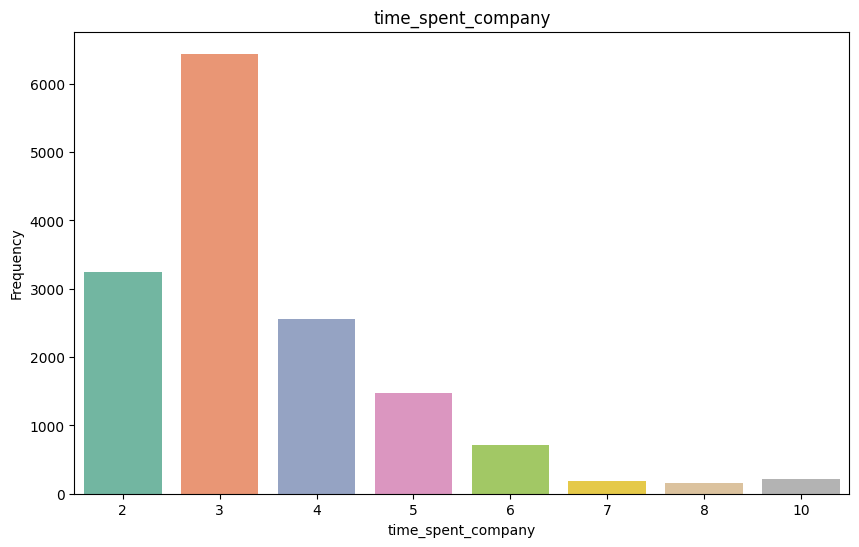

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['time_spent_company'].value_counts().index,
            y=df['time_spent_company'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('time_spent_company')
plt.xlabel('time_spent_company')
plt.ylabel('Frequency')
plt.show()

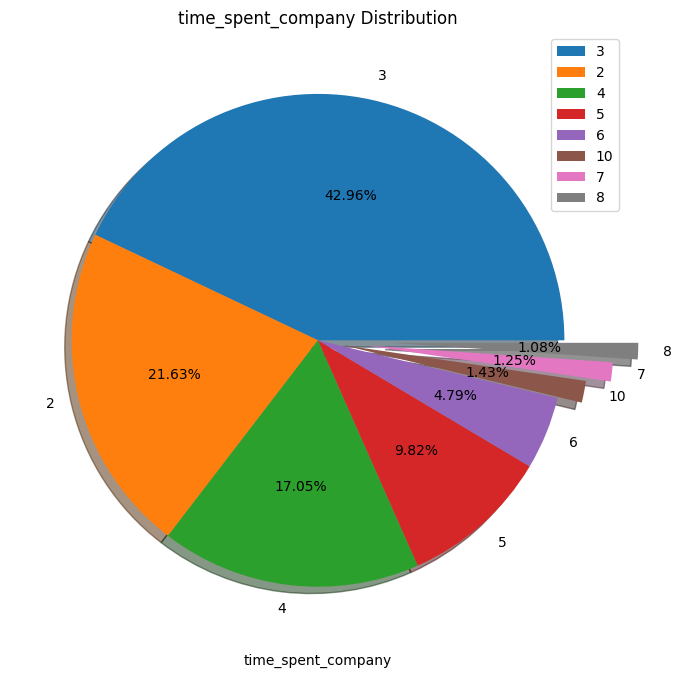

In [41]:
plt.figure(figsize=(10, 8))
plt.pie(df['time_spent_company'].value_counts(),
        explode=[0,0,0,0,0,0.1,0.2,0.3],
        labels=df['time_spent_company'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('time_spent_company Distribution')
plt.xlabel('time_spent_company')
plt.legend()
plt.show()

#### **work_accident**

In [42]:
df['work_accident'].value_counts()

work_accident
0    12830
1     2169
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\1731186550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['work_accident'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\1731186550.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['work_accident'].value_counts().index,


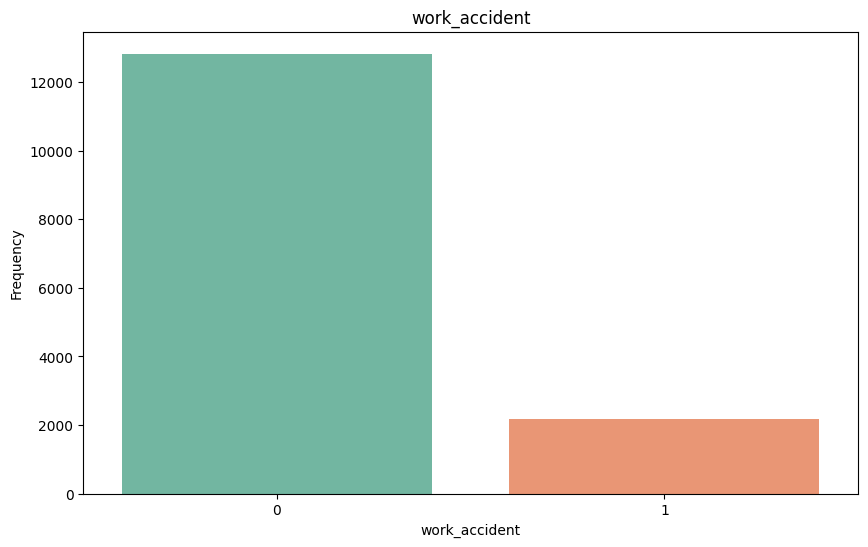

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['work_accident'].value_counts().index,
            y=df['work_accident'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('work_accident')
plt.xlabel('work_accident')
plt.ylabel('Frequency')
plt.show()

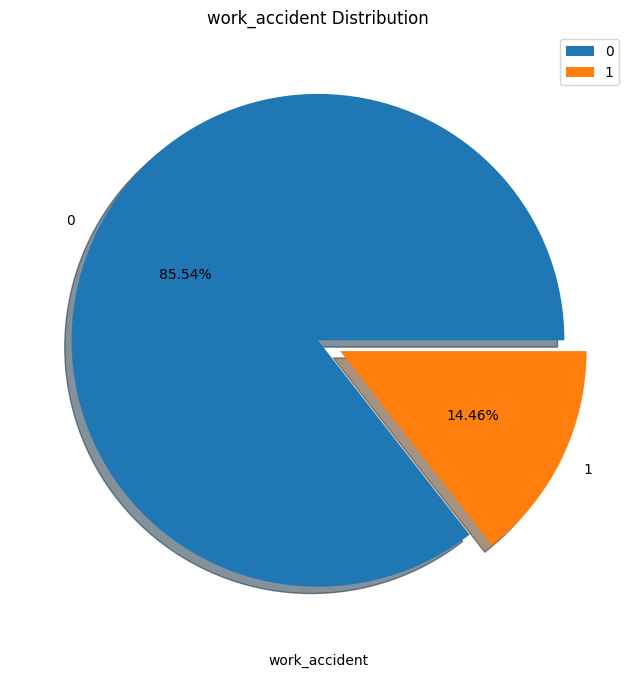

In [44]:
plt.figure(figsize=(10, 8))
plt.pie(df['work_accident'].value_counts(),
        explode=[0,0.1],
        labels=df['work_accident'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('work_accident Distribution')
plt.xlabel('work_accident')
plt.legend()
plt.show()

#### **Promotion**

In [45]:
df['Promotion'].value_counts()

Promotion
0    14680
1      319
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\4218103193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['Promotion'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\4218103193.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['Promotion'].value_counts().index,


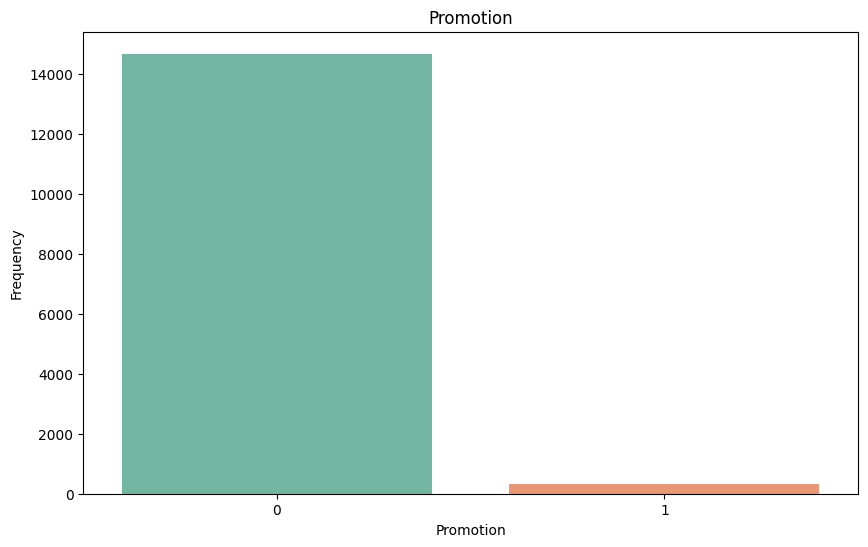

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['Promotion'].value_counts().index,
            y=df['Promotion'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Promotion')
plt.xlabel('Promotion')
plt.ylabel('Frequency')
plt.show()

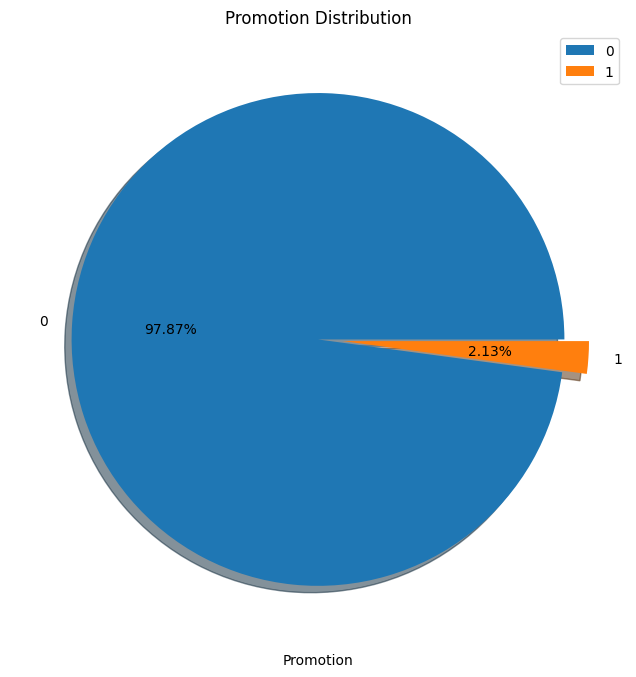

In [47]:
plt.figure(figsize=(10, 8))
plt.pie(df['Promotion'].value_counts(),
        explode=[0,0.1],
        labels=df['Promotion'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Promotion Distribution')
plt.xlabel('Promotion')
plt.legend()
plt.show()

#### **Department**

In [48]:
df['Department'].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2468777847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['Department'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2468777847.py:2: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot( x=df['Department'].value_counts().index,


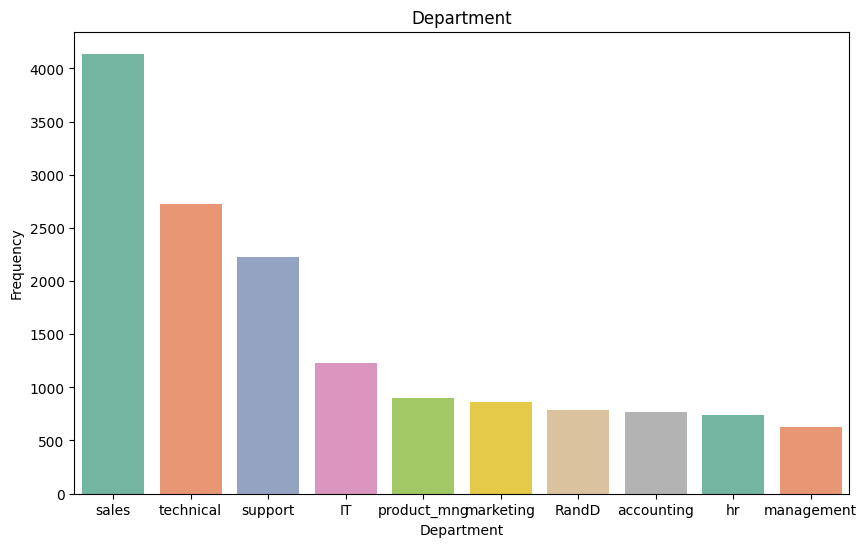

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['Department'].value_counts().index,
            y=df['Department'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Department')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.show()

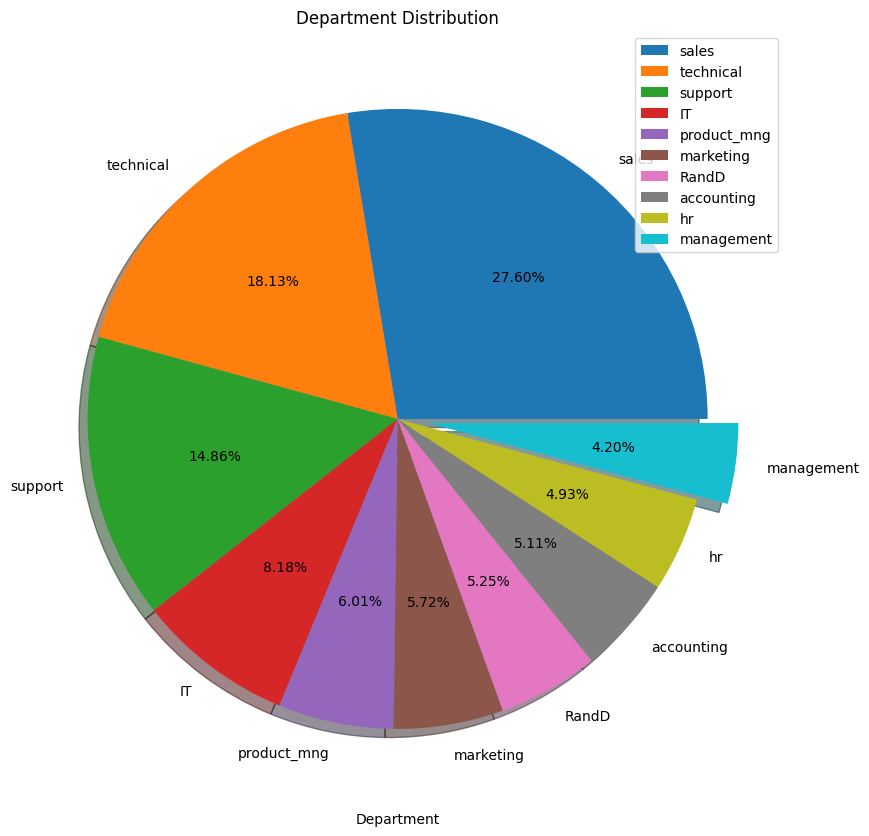

In [50]:
plt.figure(figsize=(10, 15))
plt.pie(df['Department'].value_counts(),
        explode=[0,0,0,0,0,0,0,0,0,0.1],
        labels=df['Department'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Department Distribution')
plt.xlabel('Department')
plt.legend()
plt.show()

#### **Salary_INR**

In [51]:
df['Salary_INR'].describe()

count     14999.000000
mean      62742.699913
std       66486.116149
min       10000.000000
25%       25248.000000
50%       41721.000000
75%       76354.000000
max      399930.000000
Name: Salary_INR, dtype: float64

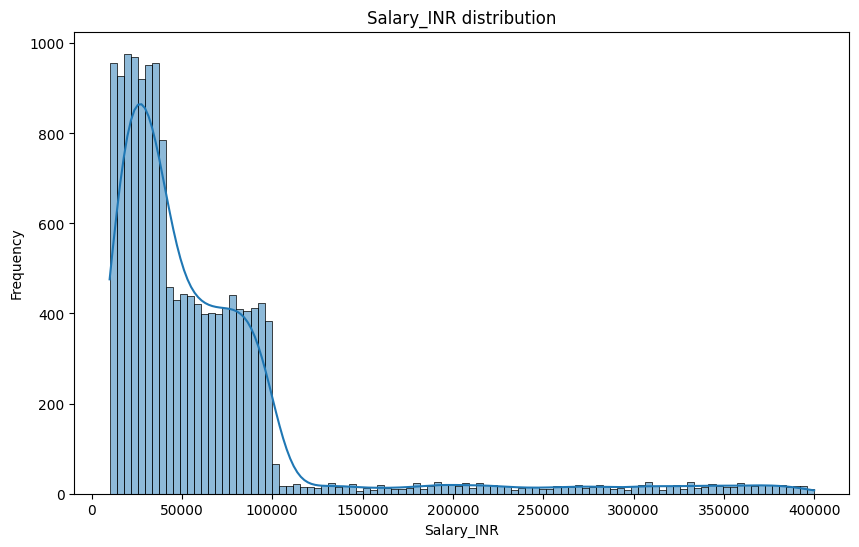

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary_INR'],bins=100, kde=True)  
plt.title("Salary_INR distribution")
plt.xlabel("Salary_INR")
plt.ylabel("Frequency")
plt.show()

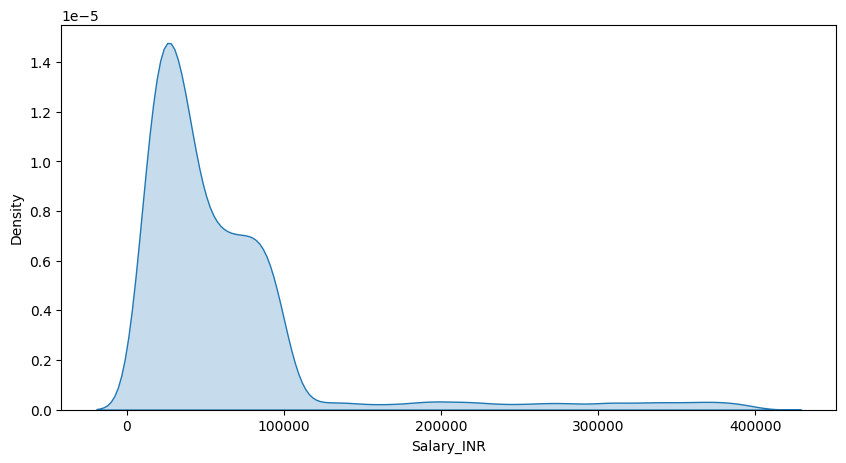

In [53]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['Salary_INR'],fill=True)
plt.show()

#### **Churn**

In [54]:
df['Churn'].value_counts()

Churn
0    11428
1     3571
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\502294621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['Churn'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\502294621.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['Churn'].value_counts().index,


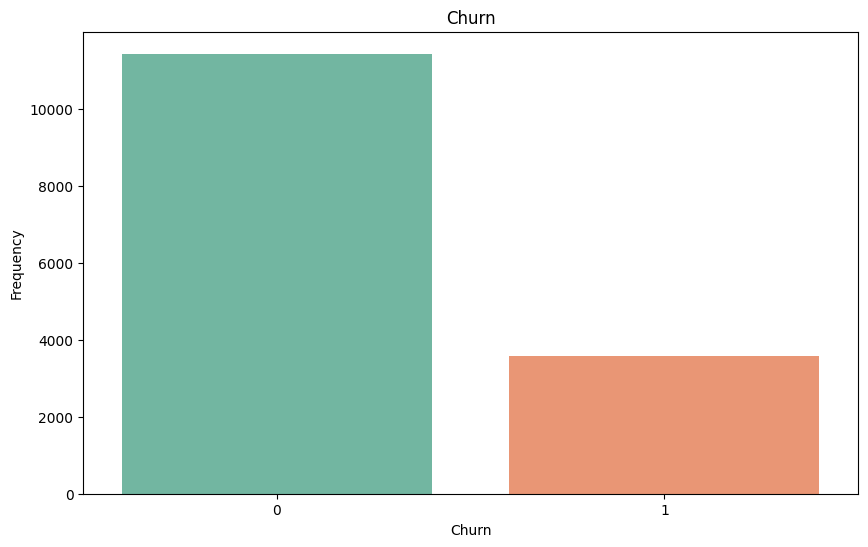

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['Churn'].value_counts().index,
            y=df['Churn'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('Churn')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.show()

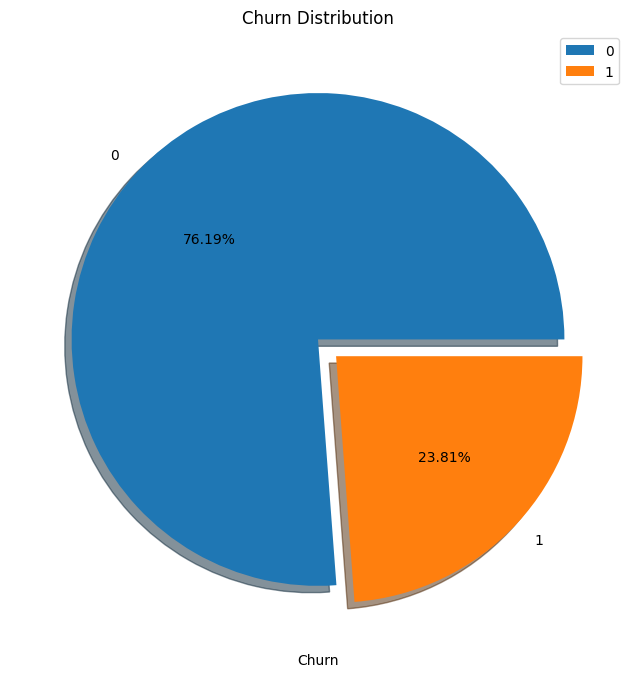

In [56]:
plt.figure(figsize=(10, 8))
plt.pie(df['Churn'].value_counts(),
        explode=[0,0.1],
        labels=df['Churn'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.legend()
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_7960\2869864324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['work_accident'],y= df['Satisfaction'],palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_7960\2869864324.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x= df['work_accident'],y= df['Satisfaction'],palette=sns.color_palette("Set2"))


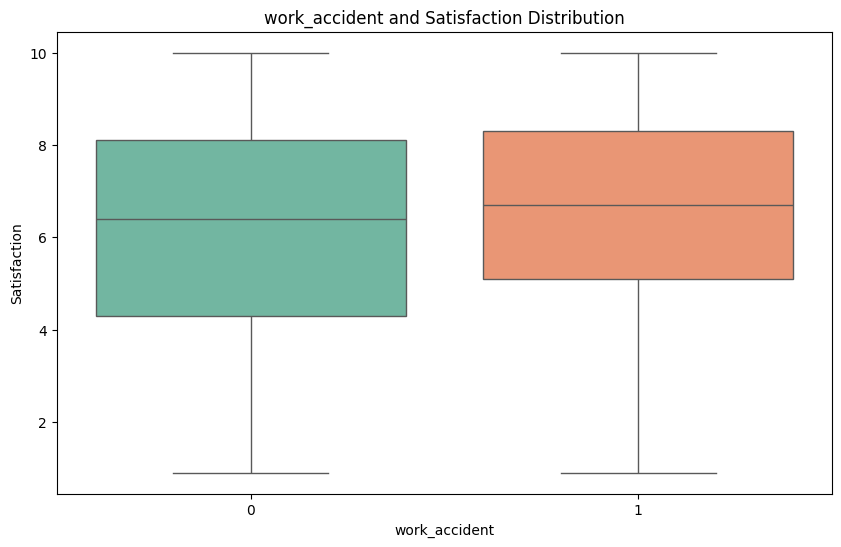

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['work_accident'],y= df['Satisfaction'],palette=sns.color_palette("Set2"))
plt.title('work_accident and Satisfaction Distribution')
plt.xlabel('work_accident')
plt.ylabel('Satisfaction')
plt.show()

In [27]:
df.head()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,780152,3.8,5.3,2,157,3,0,0,sales,11053,1
1,780153,8.0,8.6,5,262,6,0,0,sales,54063,1
2,780154,1.1,8.8,7,272,4,0,0,sales,61300,1
3,780155,7.2,8.7,5,223,5,0,0,sales,20647,1
4,780156,3.7,5.2,2,159,3,0,0,sales,17808,1


C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\3569876543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['Churn'],y= df['Satisfaction'],palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\3569876543.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x= df['Churn'],y= df['Satisfaction'],palette=sns.color_palette("Set2"))


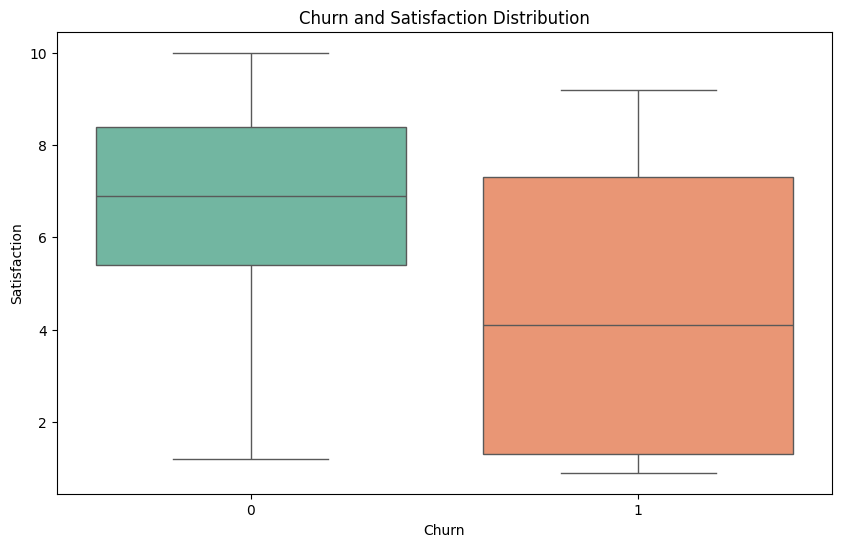

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Churn'],y= df['Satisfaction'],palette=sns.color_palette("Set2"))
plt.title('Churn and Satisfaction Distribution')
plt.xlabel('Churn')
plt.ylabel('Satisfaction')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\261729613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['Churn'],y= df['Evaluation'], palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\261729613.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x= df['Churn'],y= df['Evaluation'], palette=sns.color_palette("Set2"))


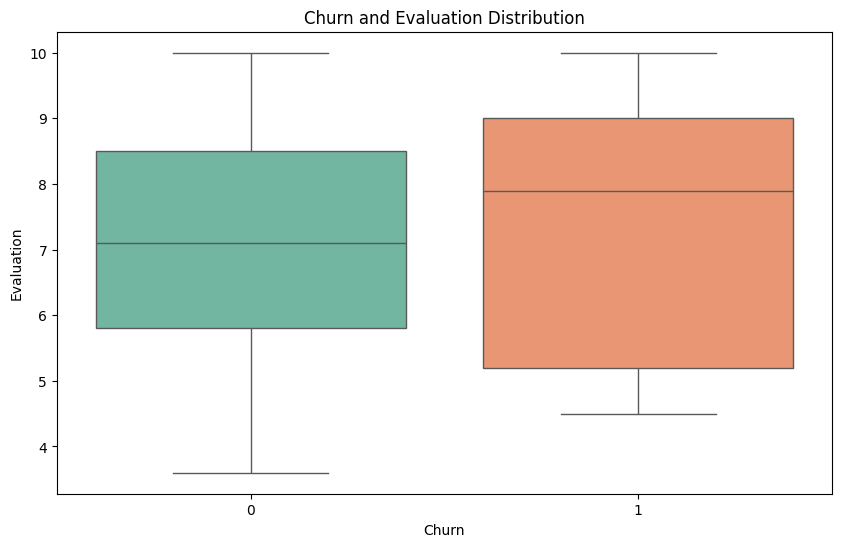

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Churn'],y= df['Evaluation'], palette=sns.color_palette("Set2"))
plt.title('Churn and Evaluation Distribution')
plt.xlabel('Churn')
plt.ylabel('Evaluation')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\1558143807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['Churn'],y= df['number_of_projects'],palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\1558143807.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x= df['Churn'],y= df['number_of_projects'],palette=sns.color_palette("Set2"))


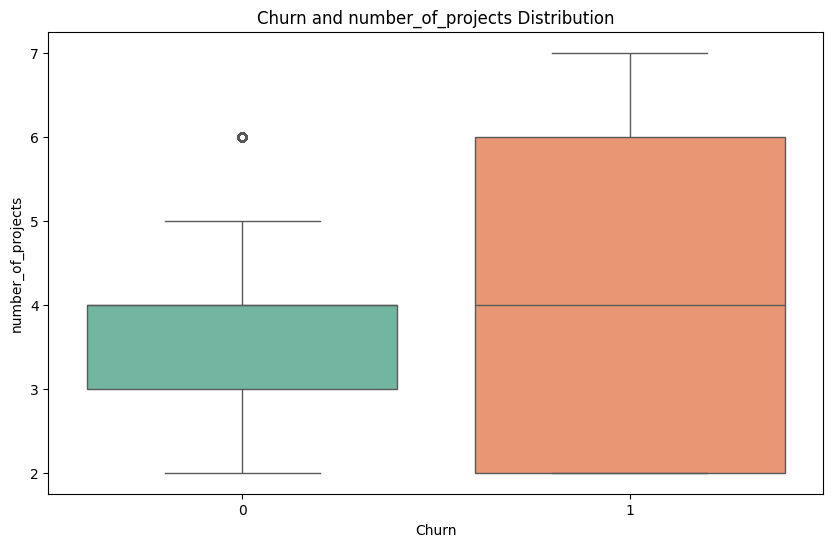

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Churn'],y= df['number_of_projects'],palette=sns.color_palette("Set2"))
plt.title('Churn and number_of_projects Distribution')
plt.xlabel('Churn')
plt.ylabel('number_of_projects')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\727615830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['Churn'],y= df['average_montly_hours'], palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\727615830.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x= df['Churn'],y= df['average_montly_hours'], palette=sns.color_palette("Set2"))


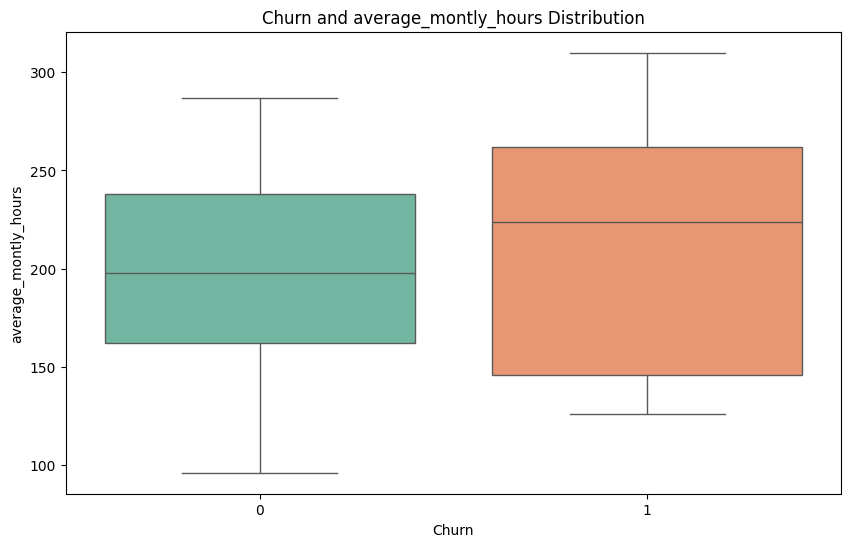

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Churn'],y= df['average_montly_hours'], palette=sns.color_palette("Set2"))
plt.title('Churn and average_montly_hours Distribution')
plt.xlabel('Churn')
plt.ylabel('average_montly_hours')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\396417208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['Churn'],y= df['time_spent_company'], palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\396417208.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x= df['Churn'],y= df['time_spent_company'], palette=sns.color_palette("Set2"))


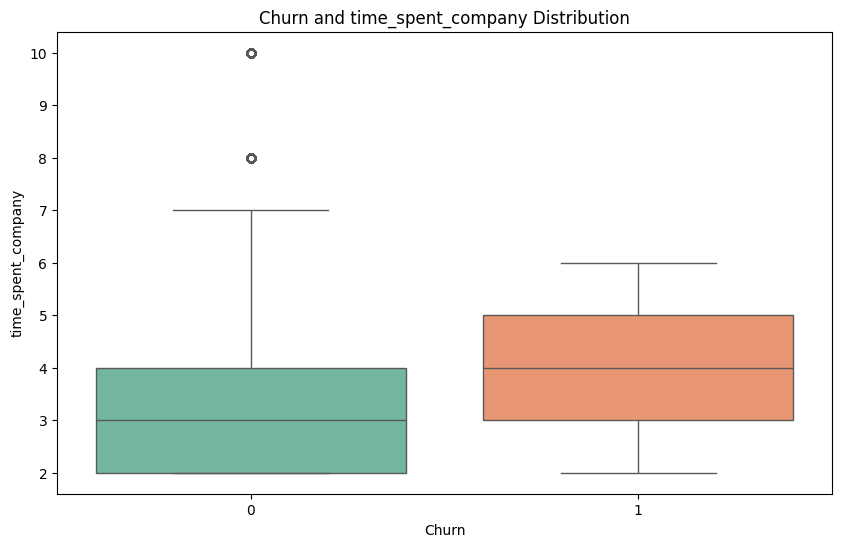

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Churn'],y= df['time_spent_company'], palette=sns.color_palette("Set2"))
plt.title('Churn and time_spent_company Distribution')
plt.xlabel('Churn')
plt.ylabel('time_spent_company')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2883335627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['Churn'],y= df['work_accident'],palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2883335627.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x= df['Churn'],y= df['work_accident'],palette=sns.color_palette("Set2"))


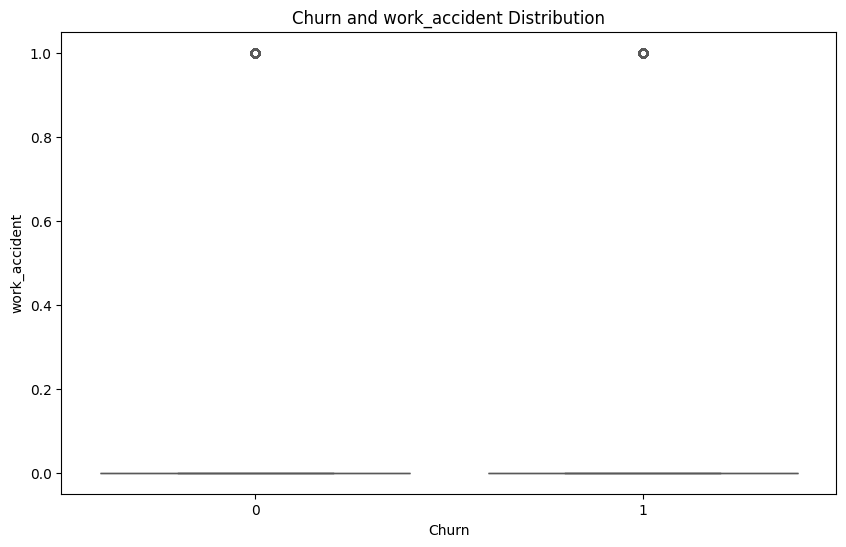

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Churn'],y= df['work_accident'],palette=sns.color_palette("Set2"))
plt.title('Churn and work_accident Distribution')
plt.xlabel('Churn')
plt.ylabel('work_accident')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\1511838337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['Churn'],y= df['Promotion'],palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\1511838337.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x= df['Churn'],y= df['Promotion'],palette=sns.color_palette("Set2"))


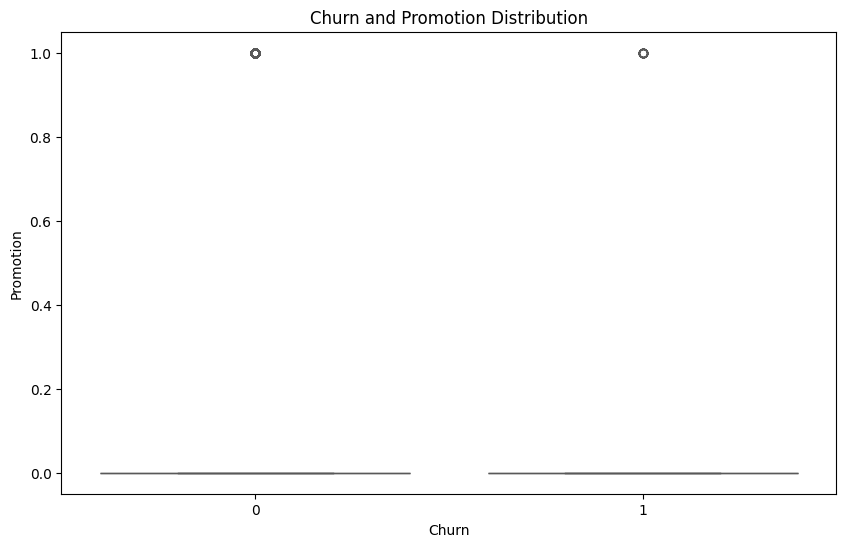

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Churn'],y= df['Promotion'],palette=sns.color_palette("Set2"))
plt.title('Churn and Promotion Distribution')
plt.xlabel('Churn')
plt.ylabel('Promotion')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_7960\328387533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['number_of_projects'],y= df['Satisfaction'],palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_7960\328387533.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.boxplot(x= df['number_of_projects'],y= df['Satisfaction'],palette=sns.color_palette("Set2"))


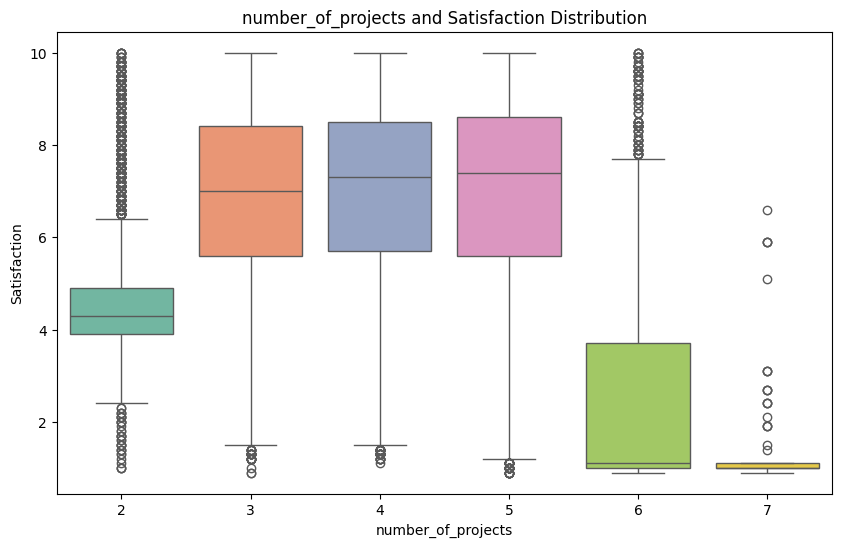

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['number_of_projects'],y= df['Satisfaction'],palette=sns.color_palette("Set2"))
plt.title('number_of_projects and Satisfaction Distribution')
plt.xlabel('number_of_projects')
plt.ylabel('Satisfaction')
plt.show()

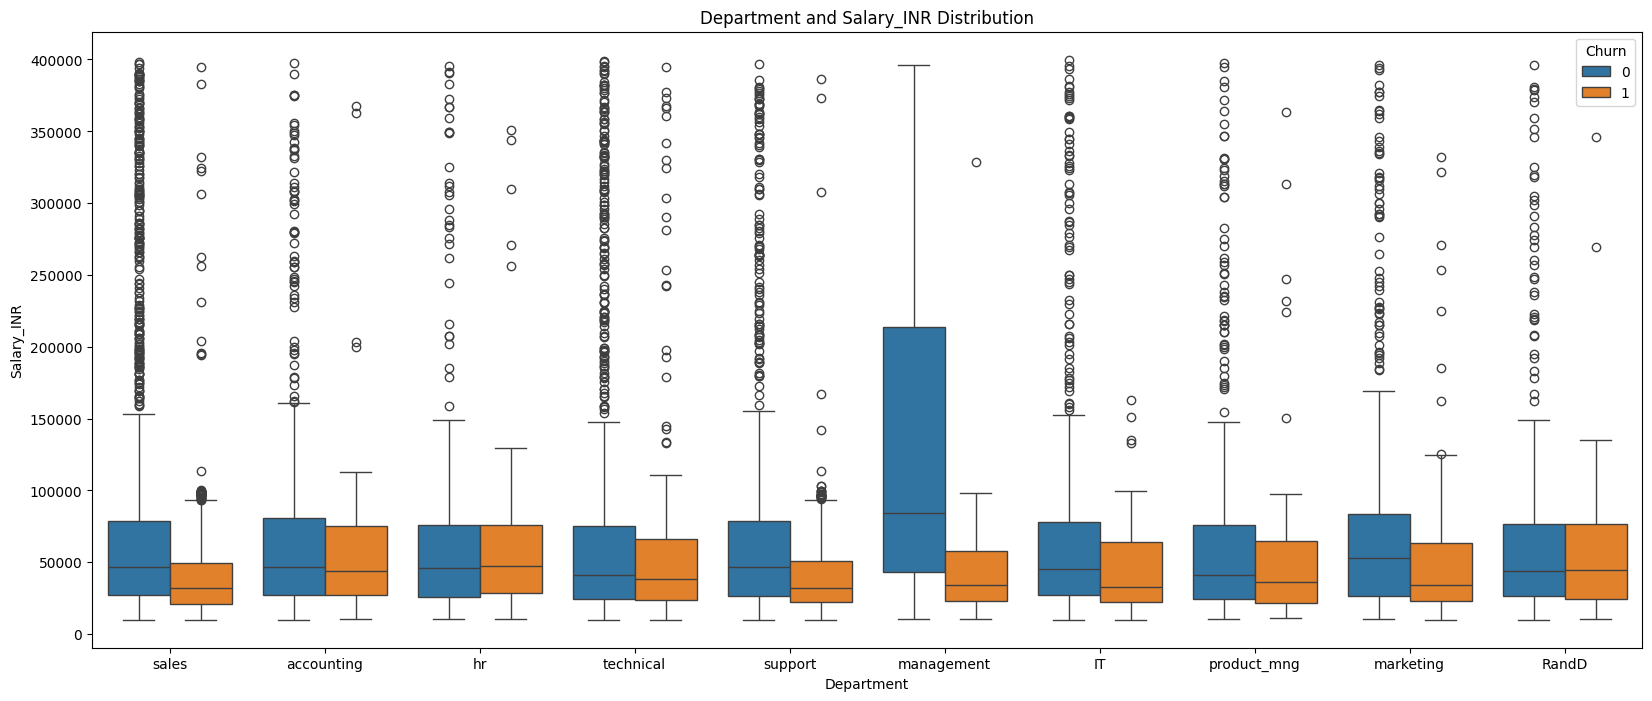

In [24]:
plt.figure(figsize=(20, 8))
sns.boxplot(x= df['Department'],y= df['Salary_INR'],hue=df['Churn'])
plt.title('Department and Salary_INR Distribution')
plt.xlabel('Department')
plt.ylabel('Salary_INR')
plt.show()

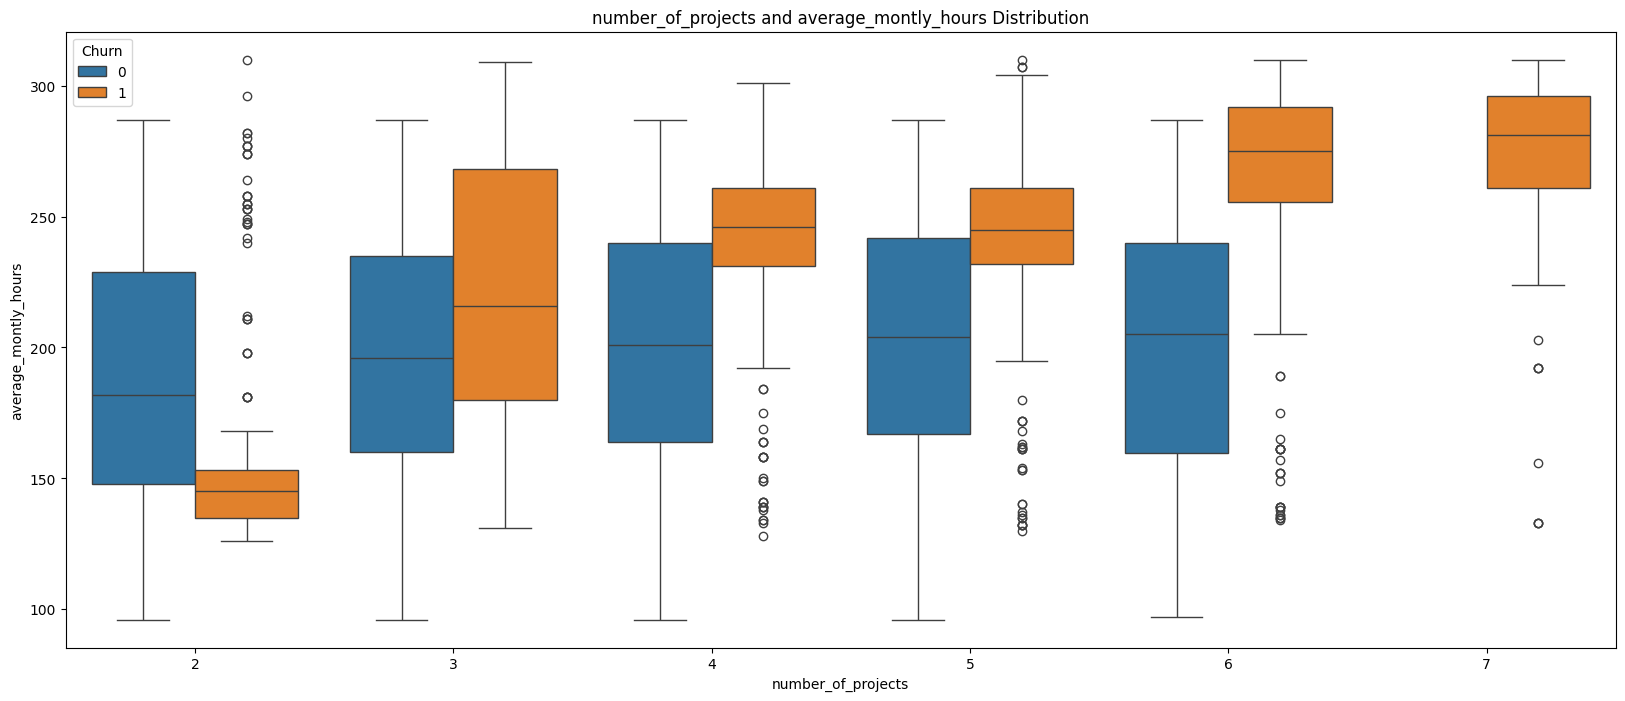

In [26]:
plt.figure(figsize=(20, 8))
sns.boxplot(x= df['number_of_projects'],y= df['average_montly_hours'],hue=df['Churn'])
plt.title('number_of_projects and average_montly_hours Distribution')
plt.xlabel('number_of_projects')
plt.ylabel('average_montly_hours')
plt.show()

In [12]:
df.head()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,780152,3.8,5.3,2,157,3,0,0,sales,11053,1
1,780153,8.0,8.6,5,262,6,0,0,sales,54063,1
2,780154,1.1,8.8,7,272,4,0,0,sales,61300,1
3,780155,7.2,8.7,5,223,5,0,0,sales,20647,1
4,780156,3.7,5.2,2,159,3,0,0,sales,17808,1


C:\Users\Abdo\AppData\Local\Temp\ipykernel_7960\2608744552.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='Department',hue='Churn',palette=sns.color_palette("Set2"))


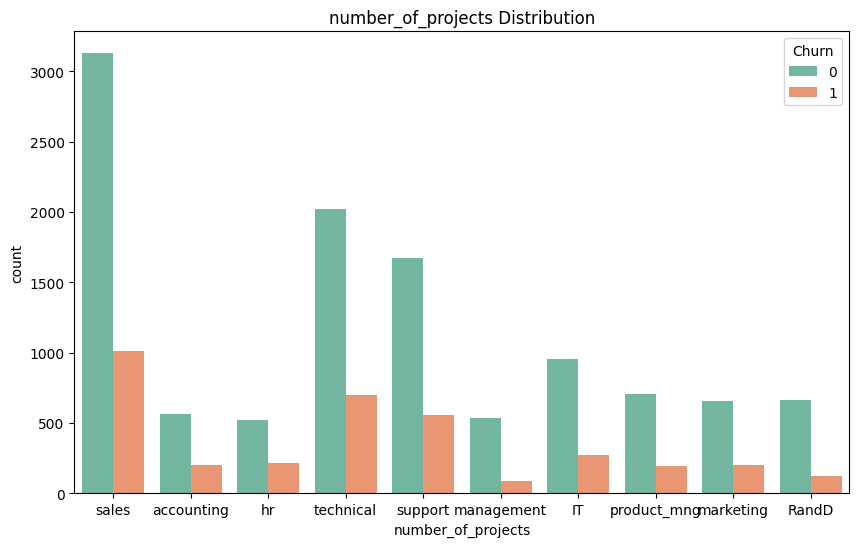

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Department',hue='Churn',palette=sns.color_palette("Set2"))
plt.title('number_of_projects Distribution')
plt.xlabel('number_of_projects')	
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\278918090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= df['Churn'],y= df['Salary_INR'], palette=sns.color_palette("Set2"))
C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\278918090.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x= df['Churn'],y= df['Salary_INR'], palette=sns.color_palette("Set2"))


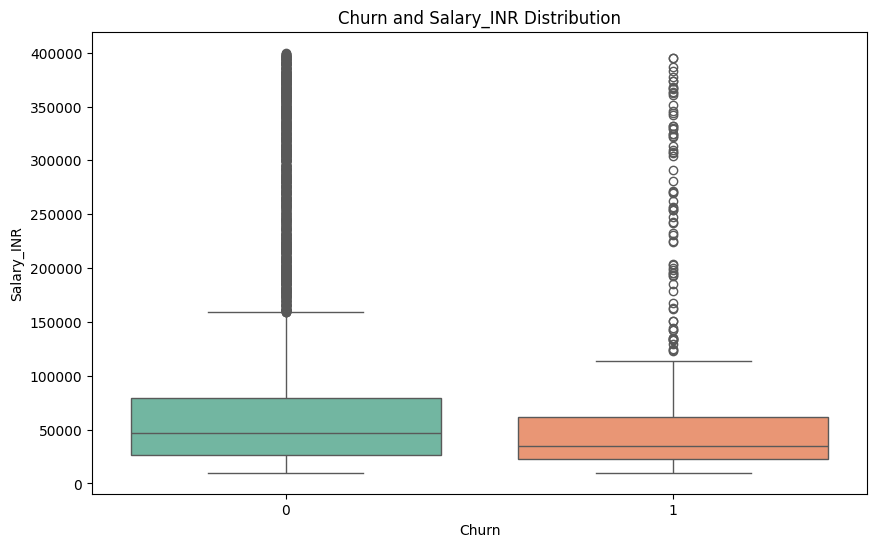

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['Churn'],y= df['Salary_INR'], palette=sns.color_palette("Set2"))
plt.title('Churn and Salary_INR Distribution')
plt.xlabel('Churn')
plt.ylabel('Salary_INR')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2378006972.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x= df['Satisfaction'],y= df['Evaluation'],hue=df['Churn'],palette=sns.color_palette("Set2"))


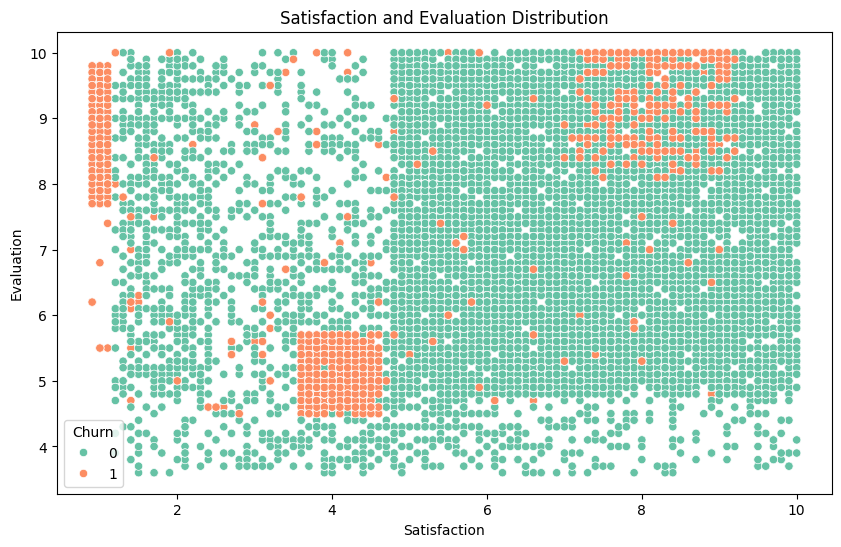

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['Satisfaction'],y= df['Evaluation'],hue=df['Churn'],palette=sns.color_palette("Set2"))
plt.title('Satisfaction and Evaluation Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\1594952276.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x= df['time_spent_company'],y= df['number_of_projects'],hue=df['Churn'],palette=sns.color_palette("Set2"))


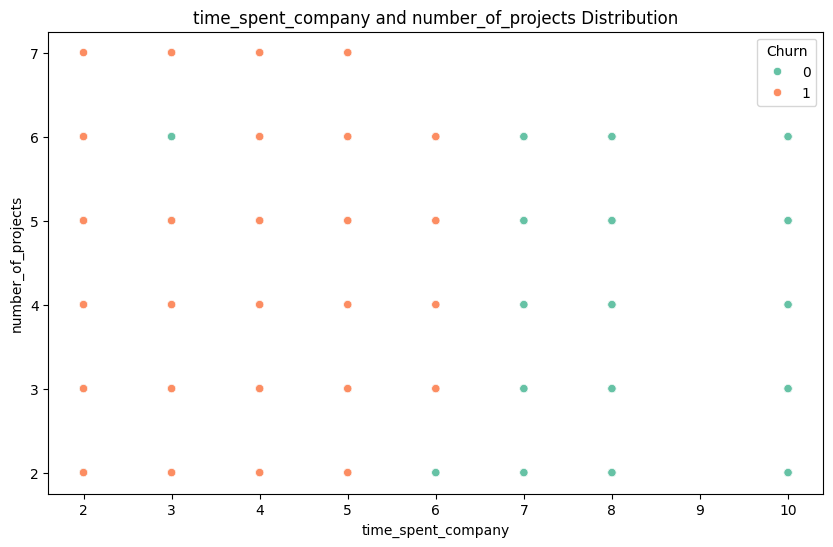

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['time_spent_company'],y= df['number_of_projects'],hue=df['Churn'],palette=sns.color_palette("Set2"))
plt.title('time_spent_company and number_of_projects Distribution')
plt.xlabel('time_spent_company')
plt.ylabel('number_of_projects')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\1214448562.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x= df['Salary_INR'],y= df['number_of_projects'],hue=df['Churn'],palette=sns.color_palette("Set2"))


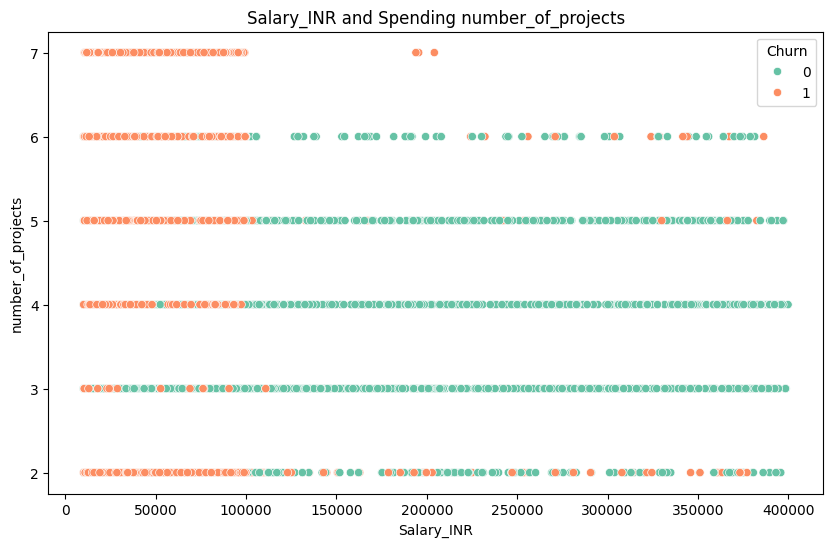

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['Salary_INR'],y= df['number_of_projects'],hue=df['Churn'],palette=sns.color_palette("Set2"))
plt.title('Salary_INR and Spending number_of_projects')
plt.xlabel('Salary_INR')
plt.ylabel('number_of_projects')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2964669730.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x= df['average_montly_hours'],y= df['Salary_INR'],hue=df['Churn'],palette=sns.color_palette("Set2"))


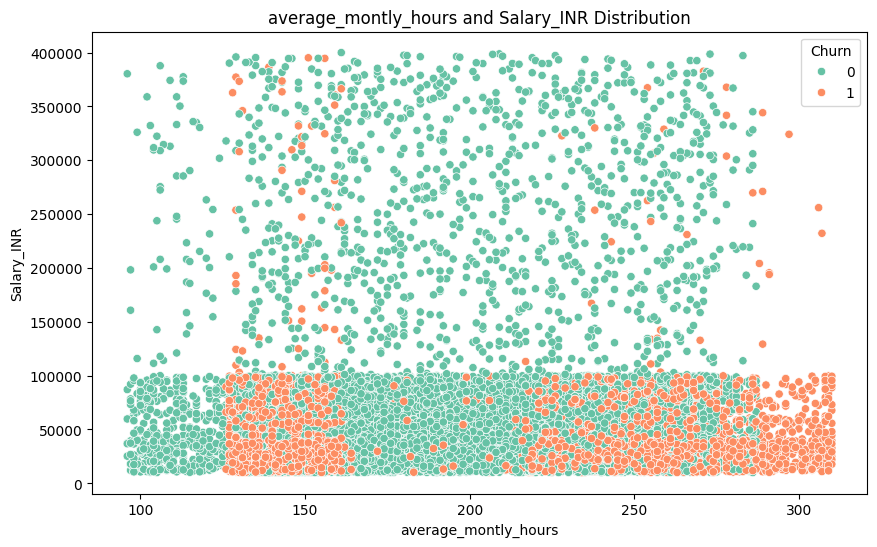

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['average_montly_hours'],y= df['Salary_INR'],hue=df['Churn'],palette=sns.color_palette("Set2"))
plt.title('average_montly_hours and Salary_INR Distribution')
plt.xlabel('average_montly_hours')
plt.ylabel('Salary_INR')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_7960\3342674647.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x= df['Satisfaction'],y= df['Salary_INR'],hue=df['Churn'],palette=sns.color_palette("Set2"))


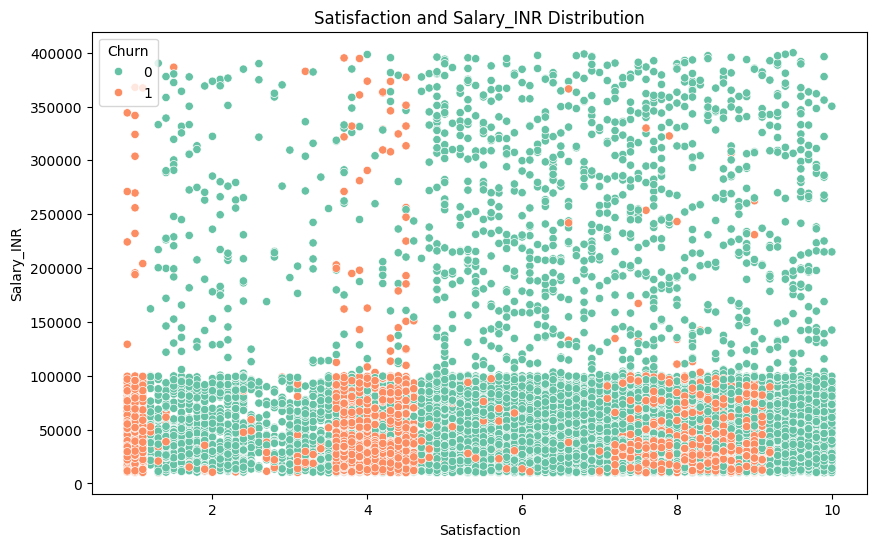

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['Satisfaction'],y= df['Salary_INR'],hue=df['Churn'],palette=sns.color_palette("Set2"))
plt.title('Satisfaction and Salary_INR Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Salary_INR')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_7960\169662935.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x= df['Salary_INR'],y= df['time_spent_company'],hue=df['Churn'],palette=sns.color_palette("Set2"))


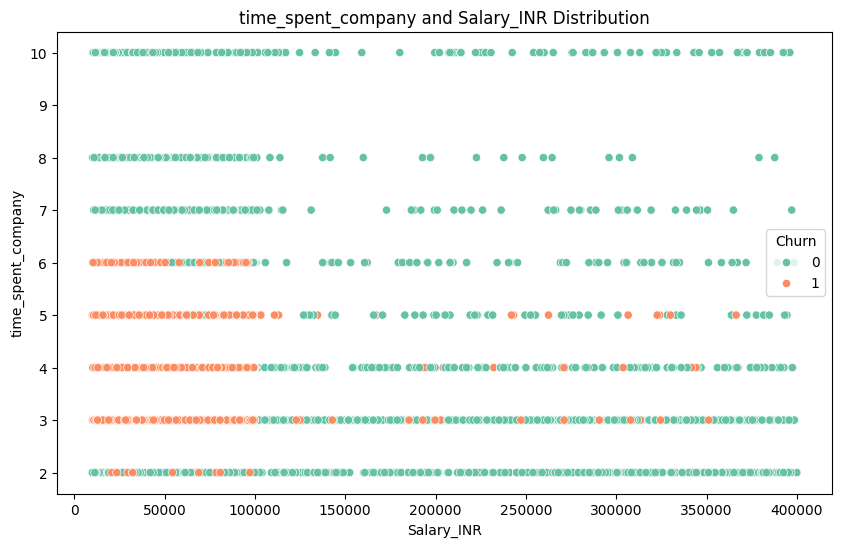

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['Salary_INR'],y= df['time_spent_company'],hue=df['Churn'],palette=sns.color_palette("Set2"))
plt.title('time_spent_company and Salary_INR Distribution')
plt.xlabel('Salary_INR')
plt.ylabel('time_spent_company')
plt.show()

In [8]:
df.head()

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,780152,3.8,5.3,2,157,3,0,0,sales,11053,1
1,780153,8.0,8.6,5,262,6,0,0,sales,54063,1
2,780154,1.1,8.8,7,272,4,0,0,sales,61300,1
3,780155,7.2,8.7,5,223,5,0,0,sales,20647,1
4,780156,3.7,5.2,2,159,3,0,0,sales,17808,1


C:\Users\Abdo\AppData\Local\Temp\ipykernel_7960\2164386838.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x= df['Satisfaction'],y= df['time_spent_company'],hue=df['Promotion'],palette=sns.color_palette("Set2"))


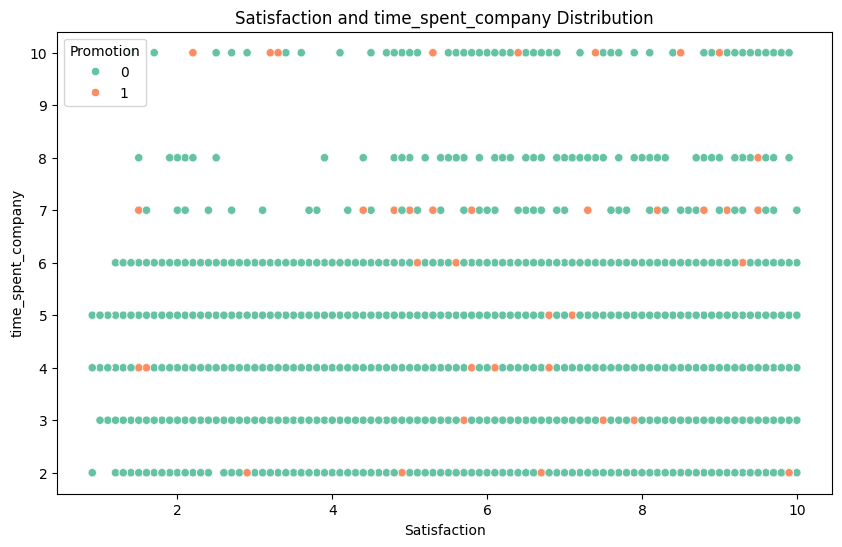

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['Satisfaction'],y= df['time_spent_company'],hue=df['Promotion'],palette=sns.color_palette("Set2"))
plt.title('Satisfaction and time_spent_company Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('time_spent_company')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\686962459.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x= df['Evaluation'],y= df['Salary_INR'],hue=df['Churn'],palette=sns.color_palette("Set2"))


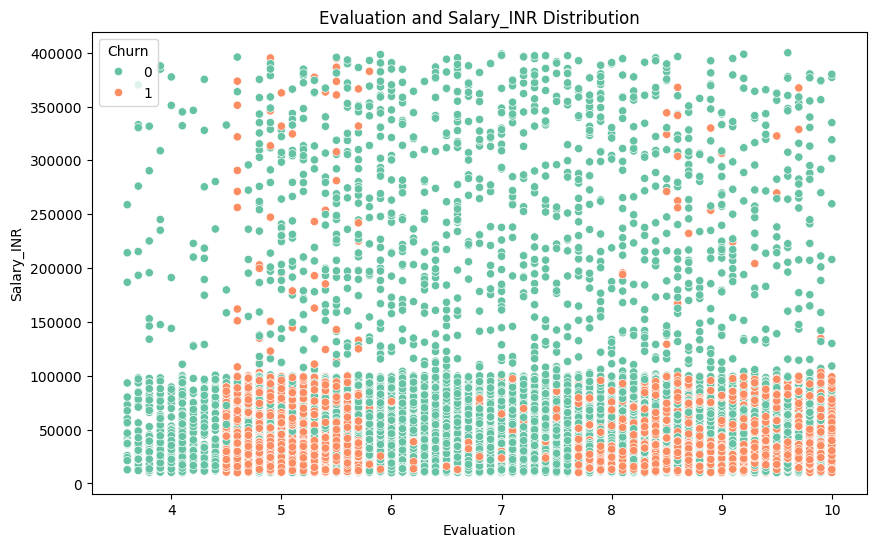

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['Evaluation'],y= df['Salary_INR'],hue=df['Churn'],palette=sns.color_palette("Set2"))
plt.title('Evaluation and Salary_INR Distribution')
plt.xlabel('Evaluation')
plt.ylabel('Salary_INR')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_7960\170248324.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='Department',hue='Churn',palette=sns.color_palette("Set2"))


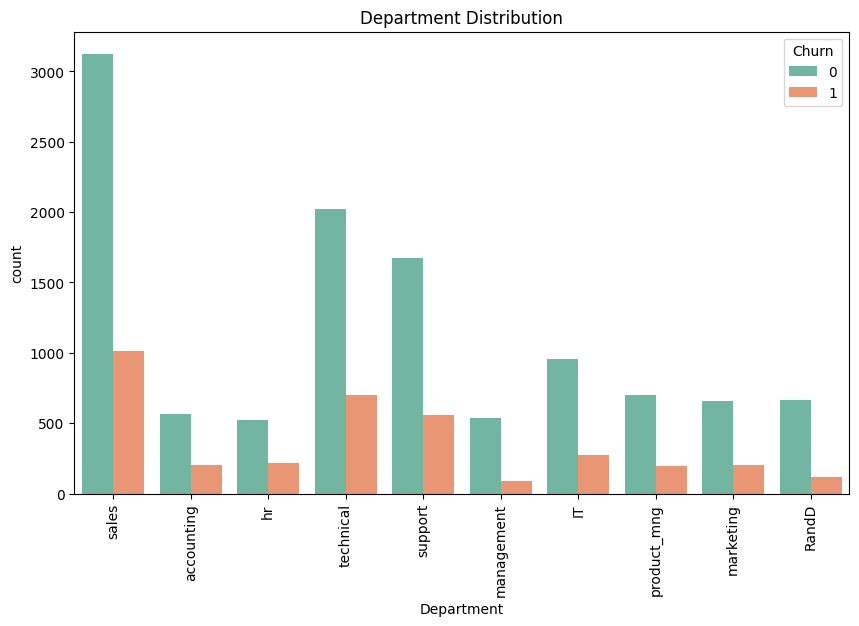

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Department',hue='Churn',palette=sns.color_palette("Set2"))
plt.title('Department Distribution')
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2696114699.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='time_spent_company',hue='Churn',palette=sns.color_palette("Set2"))


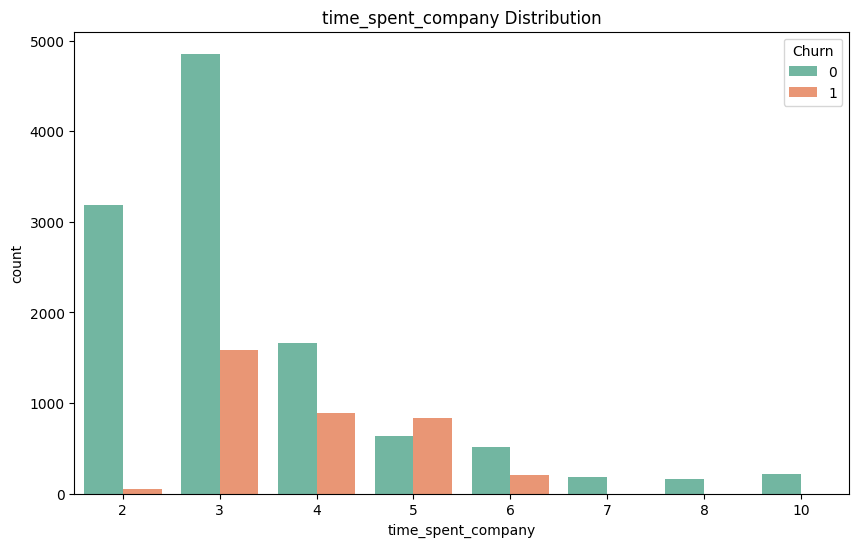

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='time_spent_company',hue='Churn',palette=sns.color_palette("Set2"))
plt.title('time_spent_company Distribution')
plt.xlabel('time_spent_company')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\2275419044.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='number_of_projects',hue='Churn',palette=sns.color_palette("Set2"))


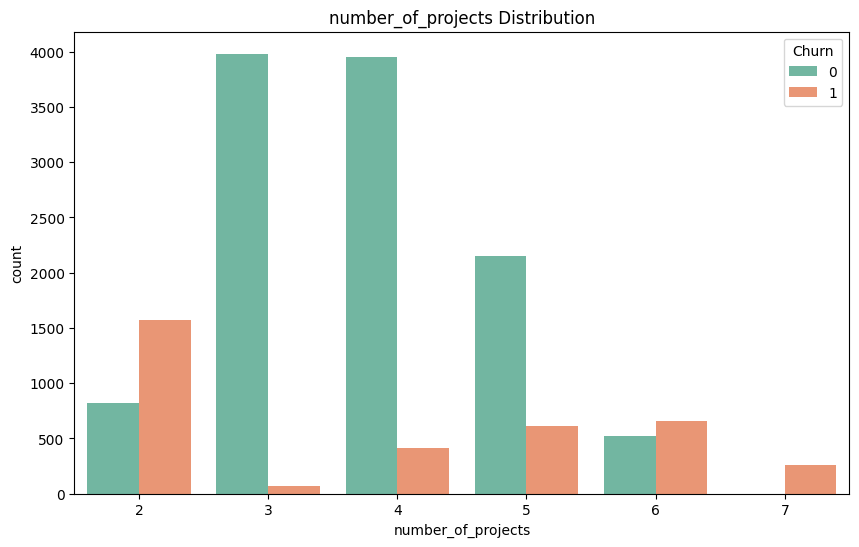

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='number_of_projects',hue='Churn',palette=sns.color_palette("Set2"))
plt.title('number_of_projects Distribution')
plt.xlabel('number_of_projects')	
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_21604\731528960.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='number_of_projects',hue='Promotion',palette=sns.color_palette("Set2"))


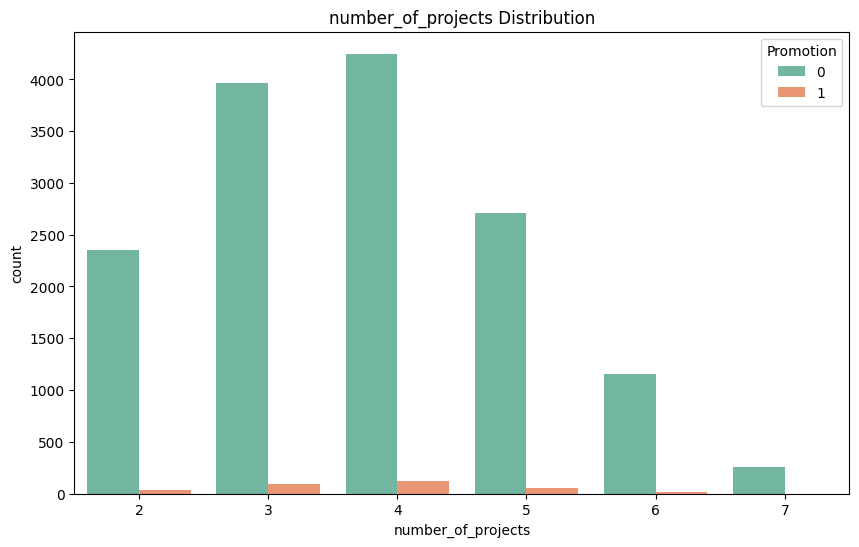

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='number_of_projects',hue='Promotion',palette=sns.color_palette("Set2"))
plt.title('number_of_projects Distribution')
plt.xlabel('number_of_projects')	
plt.show()

## **Data Preprocessing**

In [76]:
df.head(1)

,EmpId,Satisfaction,Evaluation,number_of_projects,average_montly_hours,time_spent_company,work_accident,Promotion,Department,Salary_INR,Churn
0,780152,3.8,5.3,2,157,3,0,0,sales,11053,1


#### **Define Features X and Tanget y**

In [77]:
x = df.drop(['EmpId', 'Churn'], axis=1)
y = df['Churn']

#### **Data Encoding**

In [78]:
encoder = LabelEncoder()
x['Department'] = encoder.fit_transform(x['Department'])

#### **Data Scaling**

In [79]:
scaler = MinMaxScaler()
x['average_montly_hours'] = scaler.fit_transform(x[['average_montly_hours']])
x['Salary_INR'] = scaler.fit_transform(x[['Salary_INR']])

#### **Data Splitting**

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

## **Data Modeling**

##### **LogisticRegression**

In [81]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [82]:
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy* 100:.2f}%")

Accuracy: 77.13%


In [83]:
y_pred = lr.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy* 100:.2f}%")

Accuracy: 78.05%


##### **SVC**

In [84]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [85]:
y_pred = svm_model.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:94.63%


In [86]:
y_pred = svm_model.predict(x_train)
accuracy= accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:95.04%


##### **LinearSVC**

In [87]:
linear_svm_model = LinearSVC(C=1.0)
linear_svm_model.fit(x_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [88]:
y_pred = linear_svm_model.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:76.40%


In [89]:
y_pred = linear_svm_model.predict(x_train)
accuracy= accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:77.36%


##### **KNeighborsClassifier**

In [90]:
knn_model = KNeighborsClassifier(n_neighbors=9)  
knn_model.fit(x_train, y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [91]:
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:95.83%


In [92]:
y_pred = knn_model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:96.14%


##### **DecissionTreeClassifier**

In [93]:
dt =DecisionTreeClassifier()
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [94]:
y_pred = dt.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:97.50%


In [95]:
y_pred = dt.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:100.00%


##### **BaggingClassifier**

In [96]:
bagging_model  = BaggingClassifier()
bagging_model.fit(x_train, y_train)

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [97]:
y_pred = bagging_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:98.17%


In [98]:
y_pred = bagging_model.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:99.80%


##### **RandomForestClassifier**

In [99]:
rf  = RandomForestClassifier()
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [100]:
y_pred = rf.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:98.53%


In [101]:
y_pred = dt.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:100.00%


##### **ExtraTreesClassifier**

In [128]:
et  = ExtraTreesClassifier()
et.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [129]:
y_pred = et.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:98.80%


In [104]:
y_pred = et.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:100.00%


##### **XGBoostClassifier**

In [105]:
xgb  = XGBClassifier()
xgb.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [106]:
y_pred = xgb.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:98.50%


In [107]:
y_pred = xgb.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:99.89%


##### **CatBoostClassifier**

In [108]:
cat  = CatBoostClassifier(verbose=0)
cat.fit(x_train, y_train)

In [109]:
y_pred = cat.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:98.23%


In [110]:
y_pred = cat.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:99.20%


##### **LGBMClassifier**

In [111]:
lgbm  = LGBMClassifier()
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2865, number of negative: 9134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435
[LightGBM] [Info] Start training from score -1.159435


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [112]:
y_pred = lgbm.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:98.53%


In [113]:
y_pred = lgbm.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:99.61%


##### **VotingClassifier**

In [130]:
voting_clf   = VotingClassifier(estimators=[('et', et),('rf', rf),('lgbm', lgbm)],voting='soft')
voting_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2865, number of negative: 9134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435
[LightGBM] [Info] Start training from score -1.159435


,estimators,"[('et', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [131]:
y_pred = voting_clf.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:98.90%


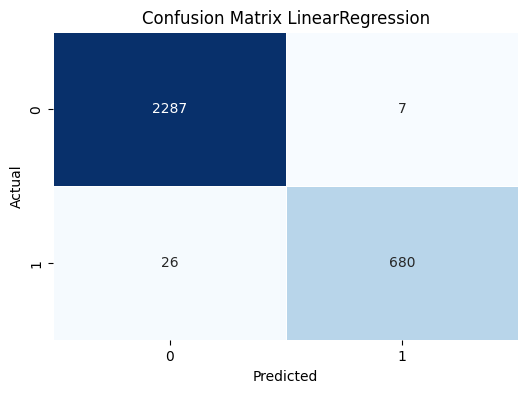

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix VotingClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [134]:
y_pred = voting_clf.predict(x_train)
accuracy=accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:100.00%


##### **StckingClassifier**

In [135]:
stacking_clf    = StackingClassifier(estimators=[('et', et),('rf', rf),('lgbm', lgbm)])
stacking_clf.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2865, number of negative: 9134
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 11999, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238770 -> initscore=-1.159435
[LightGBM] [Info] Start training from score -1.159435
[LightGBM] [Info] Number of positive: 2292, number of negative: 7307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 9599, number of used features: 9
[LightGBM] [Info] [binary:B

,estimators,"[('et', ...), ('rf', ...), ...]"
,final_estimator,None
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [136]:
y_pred = stacking_clf .predict(x_test)
accuracy=accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:98.87%


In [137]:
y_pred = stacking_clf .predict(x_train)
accuracy=accuracy_score(y_train, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:100.00%
